In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score,classification_report,cohen_kappa_score
from sklearn.metrics import roc_auc_score,roc_curve,confusion_matrix

In [2]:
data = pd.read_csv('loan_data.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


### Data Preprocessing

In [3]:
# Loan id is of no use
del data['Loan_ID']

In [4]:
# Missing values
data.isnull().sum()

Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
data[data.Self_Employed.isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
6,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
13,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
20,Female,No,2,Graduate,NaN,3750,2083.0,120.0,360.0,1.0,Semiurban,Y
72,Male,No,0,Not Graduate,NaN,7333,0.0,120.0,360.0,1.0,Rural,N
75,Female,Yes,0,Graduate,NaN,2929,2333.0,139.0,360.0,1.0,Semiurban,Y
76,Male,No,0,Graduate,NaN,5050,0.0,118.0,360.0,1.0,Semiurban,Y
96,Male,No,0,Graduate,NaN,2980,2083.0,120.0,360.0,1.0,Rural,Y
103,Male,Yes,0,Not Graduate,NaN,1820,1769.0,95.0,360.0,1.0,Rural,Y
134,Male,Yes,2,Graduate,NaN,5000,0.0,72.0,360.0,0.0,Semiurban,N
142,Male,Yes,0,Graduate,NaN,3716,0.0,42.0,180.0,1.0,Rural,Y


In [6]:
data[data['Education']=='Graduate']['Self_Employed'].mode()

0    No
Name: Self_Employed, dtype: object

In [7]:
data['Self_Employed'].fillna('No',inplace = True)

In [8]:
# Missing values in credit history
data[data['Credit_History'].isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
10,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y
29,Male,Yes,0,Graduate,No,2400,0.0,75.0,360.0,NaN,Urban,Y
56,Male,Yes,3+,Not Graduate,Yes,3333,2166.0,130.0,360.0,NaN,Semiurban,Y
60,Male,Yes,2,Not Graduate,No,3333,2000.0,99.0,360.0,NaN,Semiurban,Y
77,Male,Yes,1,Graduate,No,2214,1398.0,85.0,360.0,NaN,Urban,Y
81,Female,No,0,Graduate,No,3692,0.0,93.0,360.0,NaN,Rural,Y
110,Male,No,0,Graduate,No,1916,5063.0,67.0,360.0,NaN,Rural,N
114,Male,Yes,0,Graduate,No,2383,2138.0,58.0,360.0,NaN,Rural,Y
119,Female,Yes,0,Graduate,No,3416,2816.0,113.0,360.0,NaN,Semiurban,Y
135,Female,Yes,2,Graduate,No,4283,2383.0,127.0,360.0,NaN,Semiurban,Y


In [9]:
data['Credit_History'].value_counts()

1.0    294
0.0     57
Name: Credit_History, dtype: int64

In [10]:
data['Credit_History'].fillna(1,inplace = True)

In [11]:
# Missing value in Loan amount term
data['Loan_Amount_Term'].value_counts()

360.0    312
180.0     29
480.0     11
300.0      7
120.0      3
84.0       3
240.0      2
60.0       1
12.0       1
36.0       1
Name: Loan_Amount_Term, dtype: int64

In [12]:
data['Loan_Amount_Term'].fillna(360,inplace =True)

In [13]:
# Missing values in dependents
data['Dependents'].value_counts()

0     234
2      59
1      52
3+     28
Name: Dependents, dtype: int64

In [14]:
data['Dependents'].fillna('0',inplace = True)

In [15]:
# Missing values in Gender
data['Gender'].value_counts()

Male      291
Female     85
Name: Gender, dtype: int64

In [16]:
data['Gender'].fillna('Male',inplace = True)

In [17]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Encoding

In [18]:
data['Dependents'].replace('3+',3,inplace = True)

In [19]:
data['Dependents']= data['Dependents'].astype(int)

In [20]:
# Dummy Encoding

data = pd.get_dummies(data,drop_first = True,dtype = int)

In [21]:
data.head(2)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,1,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0,0
1,0,3000,0.0,66.0,360.0,1.0,1,1,0,1,0,1,1


In [22]:
data.dtypes

Dependents                   int32
ApplicantIncome              int64
CoapplicantIncome          float64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
Gender_Male                  int32
Married_Yes                  int32
Education_Not Graduate       int32
Self_Employed_Yes            int32
Property_Area_Semiurban      int32
Property_Area_Urban          int32
Loan_Status_Y                int32
dtype: object

### Base Model(Decision tree)

In [23]:
# Split the data into train and test
from sklearn.model_selection import train_test_split

In [24]:
x = data.drop(columns = ['Loan_Status_Y'])
y = data['Loan_Status_Y']

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.7,stratify = y,random_state = 2)

In [26]:
y.value_counts(normalize= True)

1    0.711286
0    0.288714
Name: Loan_Status_Y, dtype: float64

In [27]:
# Balance the minority class

# SMOTE
from imblearn.over_sampling import SMOTE

In [28]:
from imblearn.over_sampling._random_over_sampler import RandomOverSampler

In [29]:
from imblearn.under_sampling import RandomUnderSampler

In [30]:
smote = SMOTE(sampling_strategy=0.7)

x_train_b,y_train_b = smote.fit_resample(x_train,y_train)

In [31]:
y_train_b.value_counts()

1    189
0    132
Name: Loan_Status_Y, dtype: int64

In [32]:
def model_validation(model,xtrain,ytrain,xtest,ytest):
    global m
    m = model
    m.fit(xtrain,ytrain)
    pred = m.predict(xtest) #hard prediction(0,1)
    prob = m.predict_proba(xtest)[:,1]  #soft prediction(probablity of 1)
    
    print('Accuracy:',accuracy_score(ytest,pred))
    print('Confusion Matrix:\n',confusion_matrix(ytest,pred))
    print('Report:\n',classification_report(ytest,pred))
    print('Cohen Kappa Score:',cohen_kappa_score(ytest,pred))
    
    fpr,tpr,thres = roc_curve(ytest,prob)
    plt.plot(fpr,tpr)
    plt.plot([0,1],[0,1],color = 'red')
    plt.title(f'AUC SCORE {roc_auc_score(ytest,prob)}')

Accuracy: 0.7652173913043478
Confusion Matrix:
 [[14 19]
 [ 8 74]]
Report:
               precision    recall  f1-score   support

           0       0.64      0.42      0.51        33
           1       0.80      0.90      0.85        82

    accuracy                           0.77       115
   macro avg       0.72      0.66      0.68       115
weighted avg       0.75      0.77      0.75       115

Cohen Kappa Score: 0.36281551405704904


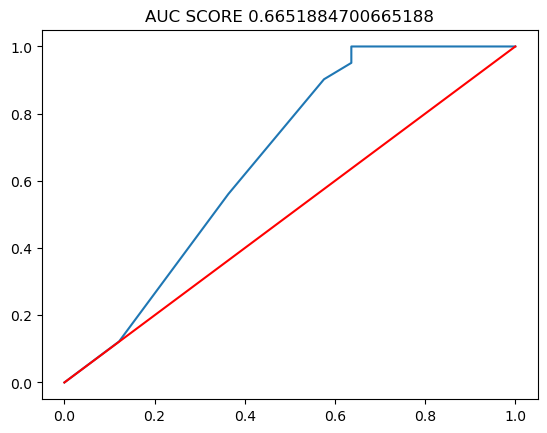

In [33]:
model_validation(DecisionTreeClassifier(criterion='entropy',max_depth = 4),
                x_train,y_train,x_test,y_test)

In [34]:
# In decision tree you can handle the imbalanced data by giving weights to the class

dtc = DecisionTreeClassifier(max_depth=7,
                            class_weight={0:100,1:1})

Accuracy: 0.43478260869565216
Confusion Matrix:
 [[19 14]
 [51 31]]
Report:
               precision    recall  f1-score   support

           0       0.27      0.58      0.37        33
           1       0.69      0.38      0.49        82

    accuracy                           0.43       115
   macro avg       0.48      0.48      0.43       115
weighted avg       0.57      0.43      0.45       115

Cohen Kappa Score: -0.03460207612456756


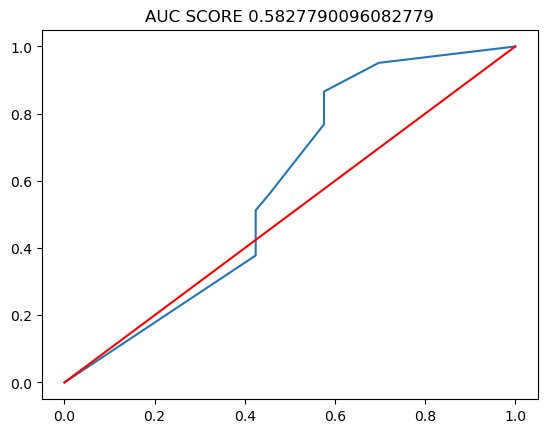

In [35]:
model_validation(dtc,x_train,y_train,x_test,y_test)

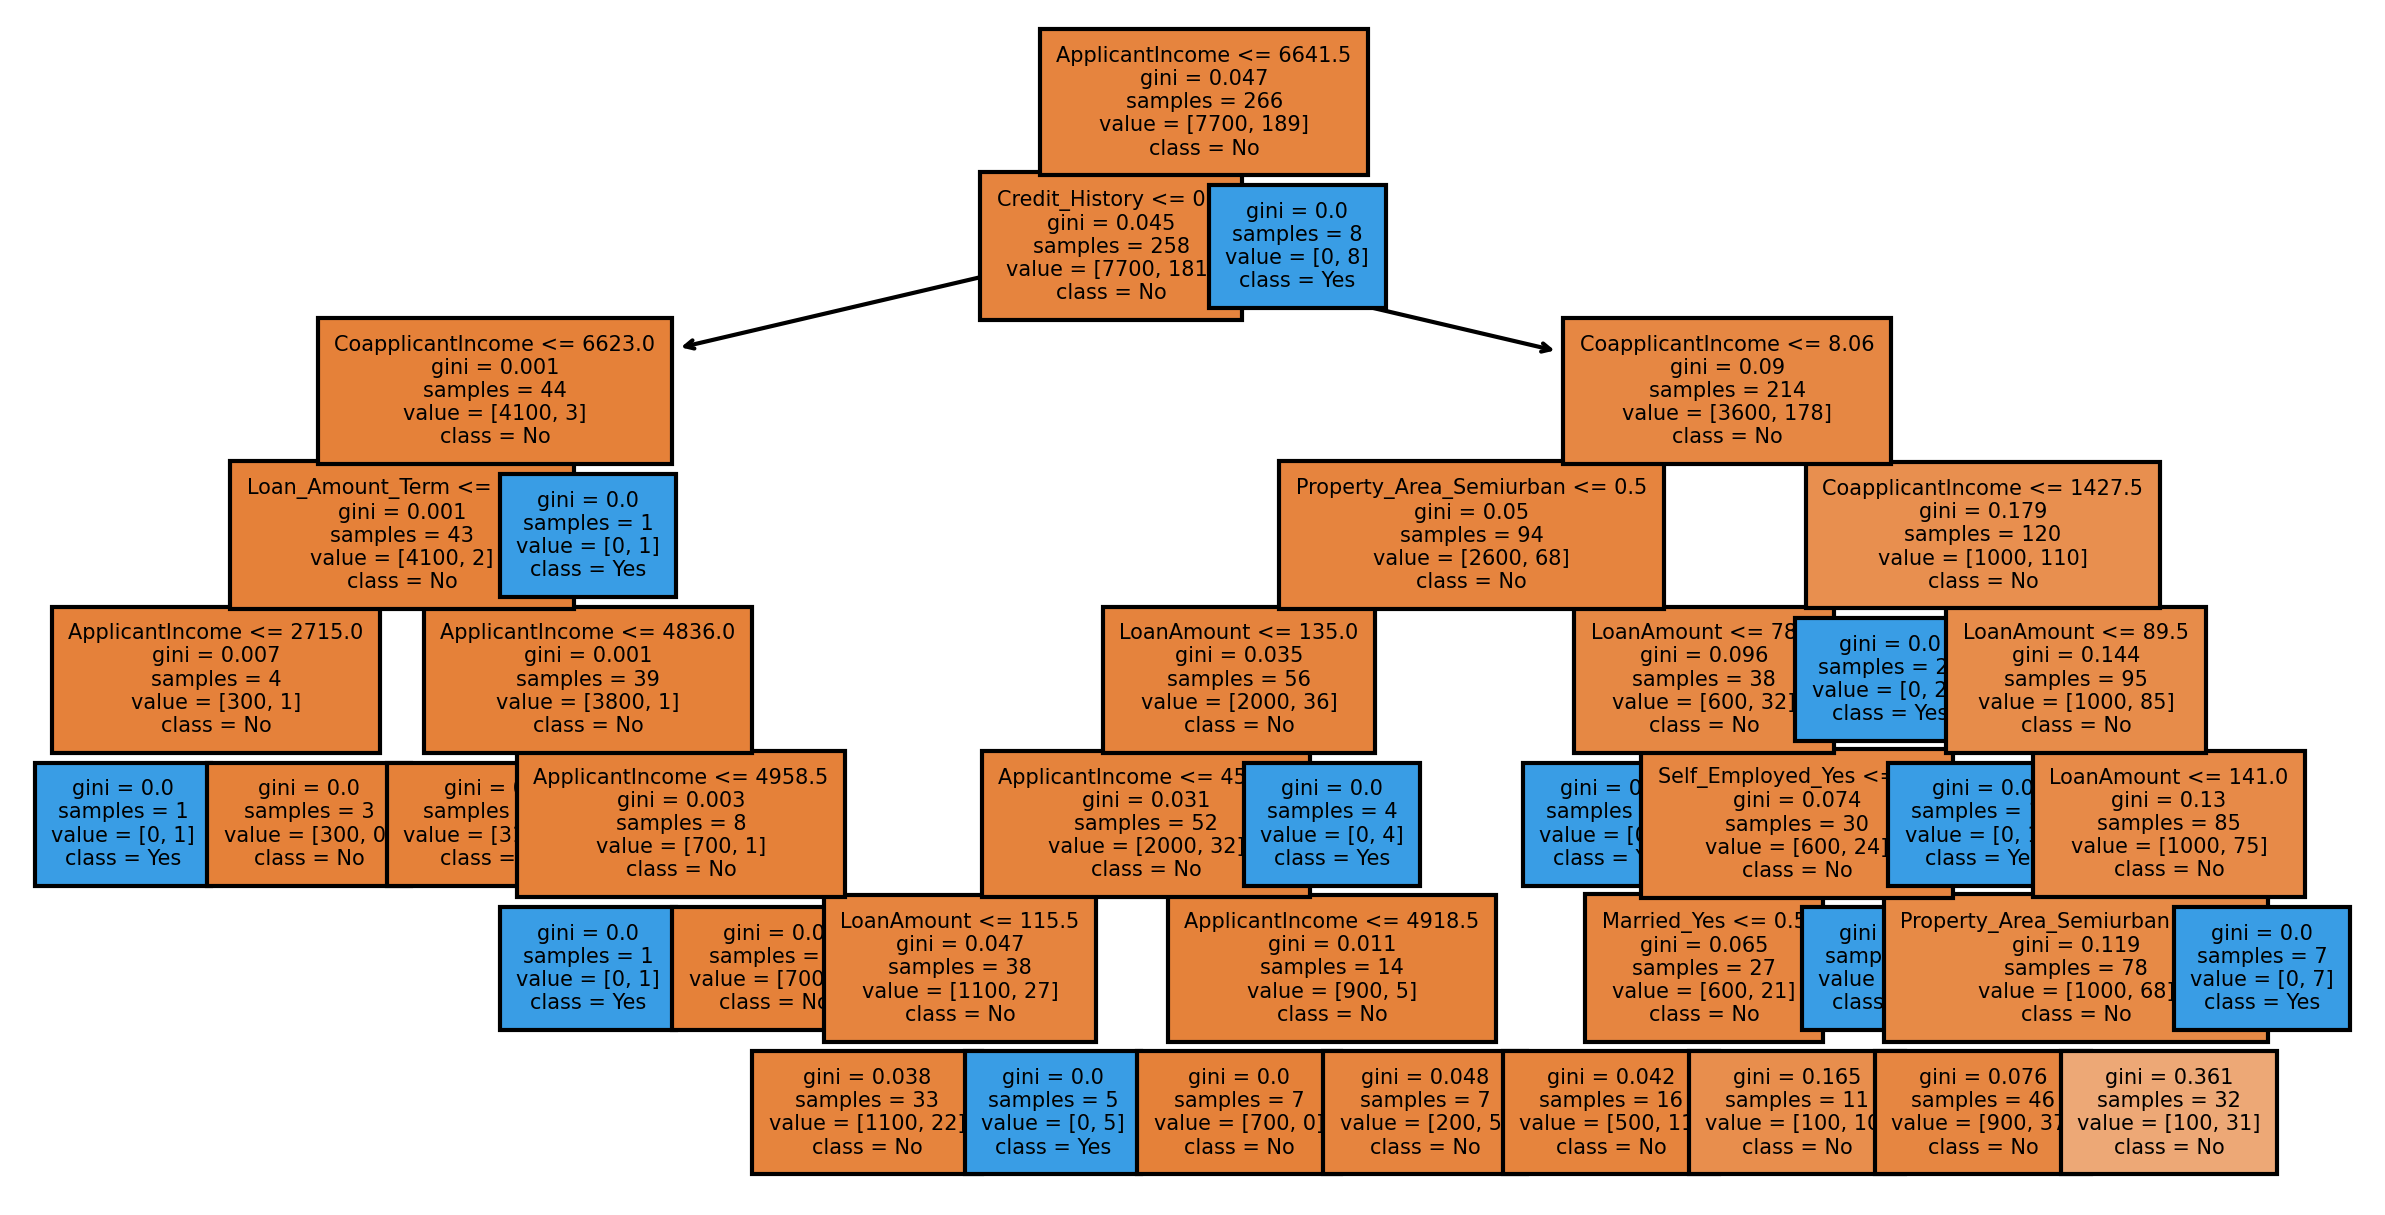

In [36]:
plt.figure(figsize = (10,5),dpi = 300)

plot_tree(m,feature_names=x.columns,class_names=['No','Yes'],filled = True,fontsize=5)
plt.show()

Accuracy: 0.8173913043478261
Confusion Matrix:
 [[14 19]
 [ 2 80]]
Report:
               precision    recall  f1-score   support

           0       0.88      0.42      0.57        33
           1       0.81      0.98      0.88        82

    accuracy                           0.82       115
   macro avg       0.84      0.70      0.73       115
weighted avg       0.83      0.82      0.79       115

Cohen Kappa Score: 0.4725922690543787


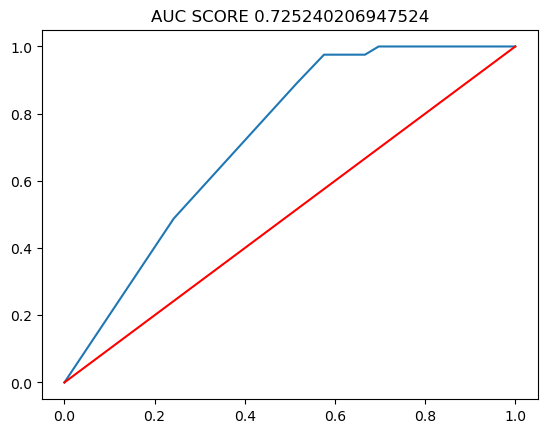

In [37]:
model_validation(DecisionTreeClassifier(criterion='entropy',max_depth=3),
                x_train_b,y_train_b,x_test,y_test)

In [38]:
pd.DataFrame({'Features': x.columns,'Importances':m.feature_importances_})

,Features,Importances
0,Dependents,0.000000
1,ApplicantIncome,0.094166
2,CoapplicantIncome,0.140554
3,LoanAmount,0.000000
4,Loan_Amount_Term,0.016368
5,Credit_History,0.748912
6,Gender_Male,0.000000
7,Married_Yes,0.000000
8,Education_Not Graduate,0.000000
9,Self_Employed_Yes,0.000000


Accuracy: 0.8173913043478261
Confusion Matrix:
 [[14 19]
 [ 2 80]]
Report:
               precision    recall  f1-score   support

           0       0.88      0.42      0.57        33
           1       0.81      0.98      0.88        82

    accuracy                           0.82       115
   macro avg       0.84      0.70      0.73       115
weighted avg       0.83      0.82      0.79       115

Cohen Kappa Score: 0.4725922690543787


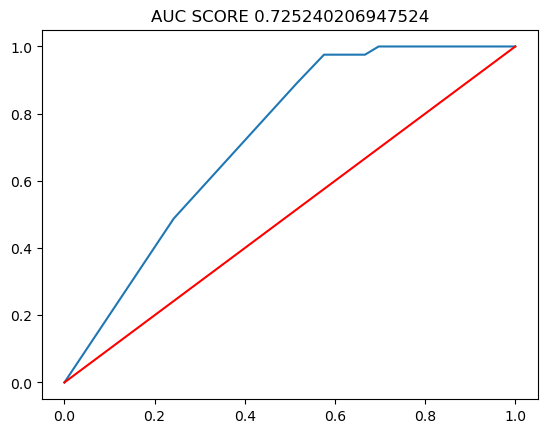

In [39]:
model_validation(DecisionTreeClassifier(criterion='entropy',max_depth=3),
                x_train,y_train,x_test,y_test)

In [40]:
pd.DataFrame({'Features': x.columns,'Importances':m.feature_importances_})

,Features,Importances
0,Dependents,0.000000
1,ApplicantIncome,0.110878
2,CoapplicantIncome,0.130692
3,LoanAmount,0.000000
4,Loan_Amount_Term,0.017379
5,Credit_History,0.741052
6,Gender_Male,0.000000
7,Married_Yes,0.000000
8,Education_Not Graduate,0.000000
9,Self_Employed_Yes,0.000000


In [41]:
# Lets tune the base model

param_grid = {'criterion':['entropy','gini'],
             'min_samples_split':[2,5,10,20,30],
             'max_depth':[3,5,7]}

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
gscv = GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=param_grid,
                   scoring = 'f1',
                   cv= 3)

In [44]:
gscv.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [3, 5, 7],
                         'min_samples_split': [2, 5, 10, 20, 30]},
             scoring='f1')

In [45]:
gscv.best_score_

0.9024617146128523

In [46]:
gscv.best_params_

{'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 5}

Accuracy: 0.8173913043478261
Confusion Matrix:
 [[16 17]
 [ 4 78]]
Report:
               precision    recall  f1-score   support

           0       0.80      0.48      0.60        33
           1       0.82      0.95      0.88        82

    accuracy                           0.82       115
   macro avg       0.81      0.72      0.74       115
weighted avg       0.82      0.82      0.80       115

Cohen Kappa Score: 0.4942408376963351


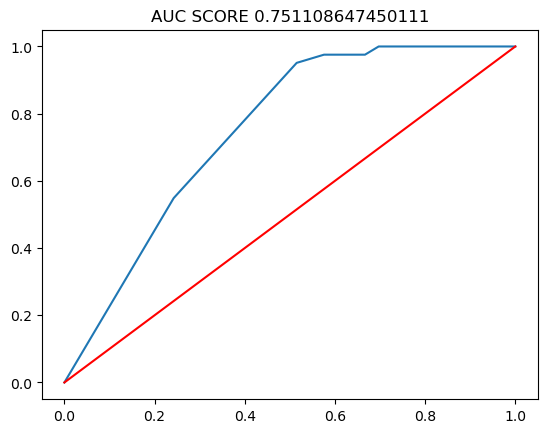

In [47]:
model_validation(DecisionTreeClassifier(**gscv.best_params_),
                x_train_b,y_train_b,x_test,y_test)

Accuracy: 0.8173913043478261
Confusion Matrix:
 [[16 17]
 [ 4 78]]
Report:
               precision    recall  f1-score   support

           0       0.80      0.48      0.60        33
           1       0.82      0.95      0.88        82

    accuracy                           0.82       115
   macro avg       0.81      0.72      0.74       115
weighted avg       0.82      0.82      0.80       115

Cohen Kappa Score: 0.4942408376963351


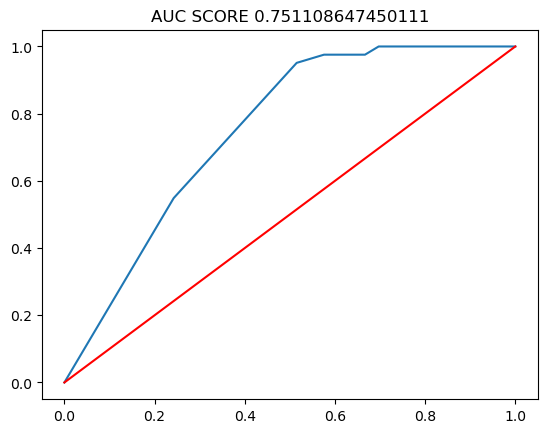

In [48]:
model_validation(DecisionTreeClassifier(**gscv.best_params_),
                x_train,y_train,x_test,y_test)

### Random Forest(bagging)

Accuracy: 0.8260869565217391
Confusion Matrix:
 [[13 20]
 [ 0 82]]
Report:
               precision    recall  f1-score   support

           0       1.00      0.39      0.57        33
           1       0.80      1.00      0.89        82

    accuracy                           0.83       115
   macro avg       0.90      0.70      0.73       115
weighted avg       0.86      0.83      0.80       115

Cohen Kappa Score: 0.4810469314079422


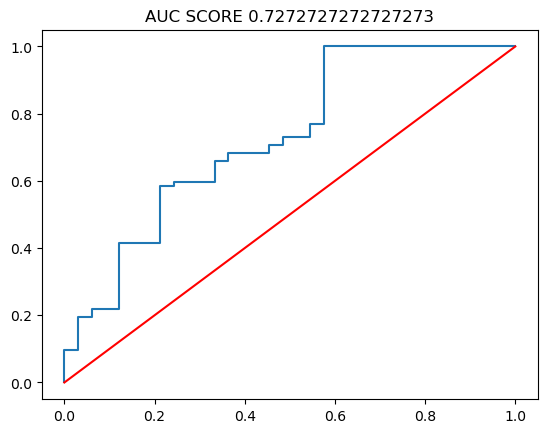

In [49]:
model_validation(RandomForestClassifier(max_depth=4),
                x_train,y_train,x_test,y_test)

In [50]:
# Bagging

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier

Accuracy: 0.6434782608695652
Confusion Matrix:
 [[ 6 27]
 [14 68]]
Report:
               precision    recall  f1-score   support

           0       0.30      0.18      0.23        33
           1       0.72      0.83      0.77        82

    accuracy                           0.64       115
   macro avg       0.51      0.51      0.50       115
weighted avg       0.60      0.64      0.61       115

Cohen Kappa Score: 0.012565445026177957


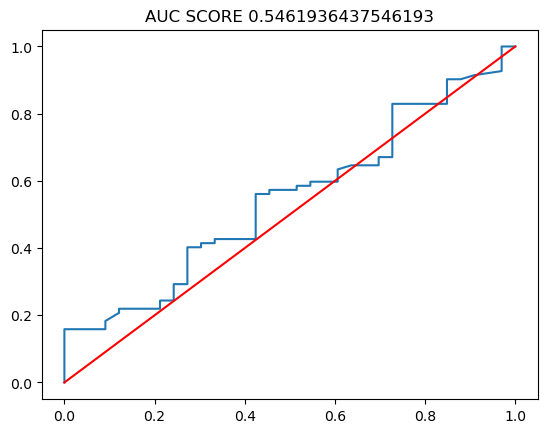

In [52]:
model_validation(BaggingClassifier(estimator=KNeighborsClassifier(),n_estimators=100),
                x_train,y_train,x_test,y_test)

In [53]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier

Accuracy: 0.808695652173913
Confusion Matrix:
 [[14 19]
 [ 3 79]]
Report:
               precision    recall  f1-score   support

           0       0.82      0.42      0.56        33
           1       0.81      0.96      0.88        82

    accuracy                           0.81       115
   macro avg       0.81      0.69      0.72       115
weighted avg       0.81      0.81      0.79       115

Cohen Kappa Score: 0.4533275713050994


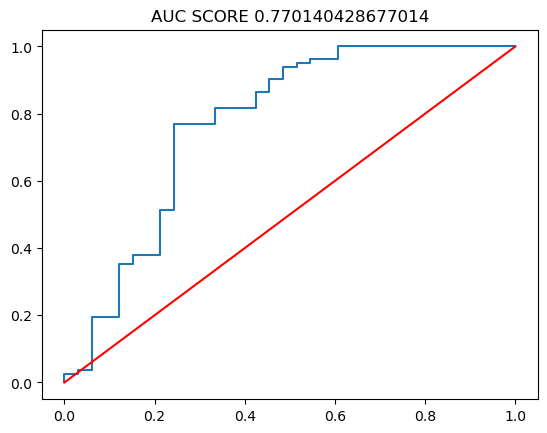

In [54]:
model_validation(BaggingClassifier(estimator=GaussianNB(),n_estimators=100),
                x_train_b,y_train_b,x_test,y_test)

### Adaptive Boosting

In [55]:
from sklearn.ensemble import AdaBoostClassifier

In [56]:
ada = AdaBoostClassifier(n_estimators=200)

Accuracy: 0.7391304347826086
Confusion Matrix:
 [[16 17]
 [13 69]]
Report:
               precision    recall  f1-score   support

           0       0.55      0.48      0.52        33
           1       0.80      0.84      0.82        82

    accuracy                           0.74       115
   macro avg       0.68      0.66      0.67       115
weighted avg       0.73      0.74      0.73       115

Cohen Kappa Score: 0.3385736196319018


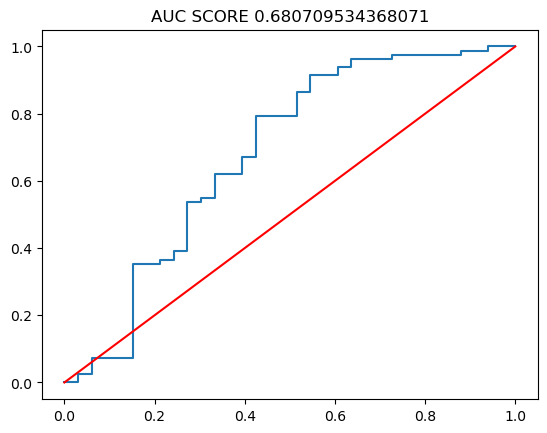

In [57]:
model_validation(ada,x_train,y_train,x_test,y_test)

In [58]:
# Bagging is giving best result among all models

### Gradient Boosting

In [59]:
from sklearn.ensemble import GradientBoostingClassifier

In [60]:
gbc = GradientBoostingClassifier(n_estimators=100)

Accuracy: 0.7913043478260869
Confusion Matrix:
 [[15 18]
 [ 6 76]]
Report:
               precision    recall  f1-score   support

           0       0.71      0.45      0.56        33
           1       0.81      0.93      0.86        82

    accuracy                           0.79       115
   macro avg       0.76      0.69      0.71       115
weighted avg       0.78      0.79      0.78       115

Cohen Kappa Score: 0.427860696517413


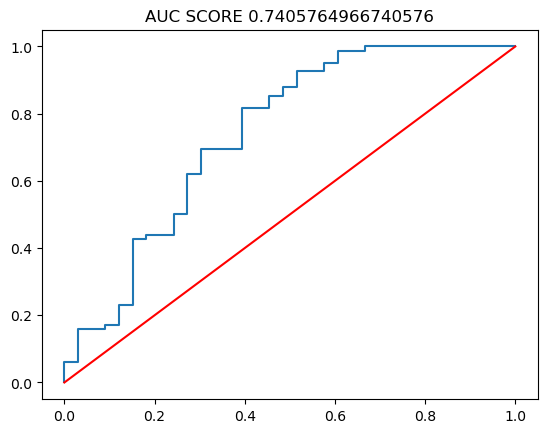

In [61]:
model_validation(gbc,x_train,y_train,x_test,y_test)

In [62]:
gbc.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [63]:
param = {'learning_rate':[0.1,0.05,0.01,0.005,0.001],
        'n_estimators':[50,60,75,100],
        'max_depth':[2,3,4,5]}

In [64]:
gscv = GridSearchCV(estimator=GradientBoostingClassifier(),
                   scoring='f1_macro',
                   param_grid = param,cv = 3)

In [65]:
gscv.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.01, 0.005, 0.001],
                         'max_depth': [2, 3, 4, 5],
                         'n_estimators': [50, 60, 75, 100]},
             scoring='f1_macro')

In [66]:
gscv.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 60}

In [67]:
gscv.best_score_

0.8040623243154718

Accuracy: 0.8
Confusion Matrix:
 [[15 18]
 [ 5 77]]
Report:
               precision    recall  f1-score   support

           0       0.75      0.45      0.57        33
           1       0.81      0.94      0.87        82

    accuracy                           0.80       115
   macro avg       0.78      0.70      0.72       115
weighted avg       0.79      0.80      0.78       115

Cohen Kappa Score: 0.4460732984293193


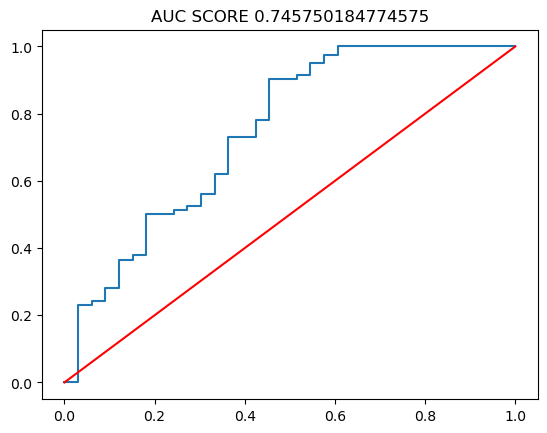

In [68]:
model_validation(GradientBoostingClassifier(**gscv.best_params_),x_train,y_train,x_test,y_test)

Accuracy: 0.9323308270676691
Confusion Matrix:
 [[ 59  18]
 [  0 189]]
Report:
               precision    recall  f1-score   support

           0       1.00      0.77      0.87        77
           1       0.91      1.00      0.95       189

    accuracy                           0.93       266
   macro avg       0.96      0.88      0.91       266
weighted avg       0.94      0.93      0.93       266

Cohen Kappa Score: 0.8232558139534883


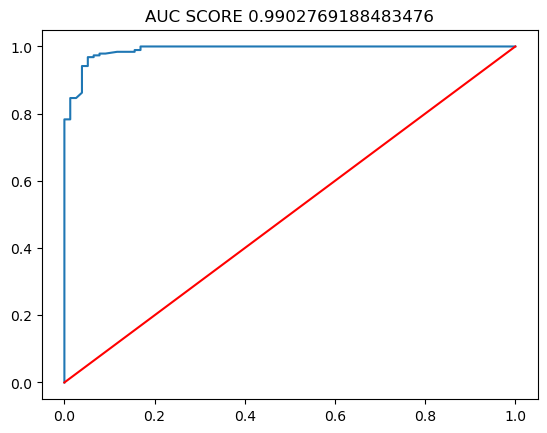

In [69]:
model_validation(GradientBoostingClassifier(**gscv.best_params_),x_train,y_train ,x_train,y_train)

### XGBOOST

In [70]:
xgb = XGBClassifier(n_estimators = 50,eta = 1,gamma=3,reg_lambda=0)

Accuracy: 0.782608695652174
Confusion Matrix:
 [[14 19]
 [ 6 76]]
Report:
               precision    recall  f1-score   support

           0       0.70      0.42      0.53        33
           1       0.80      0.93      0.86        82

    accuracy                           0.78       115
   macro avg       0.75      0.68      0.69       115
weighted avg       0.77      0.78      0.76       115

Cohen Kappa Score: 0.39790575916230364


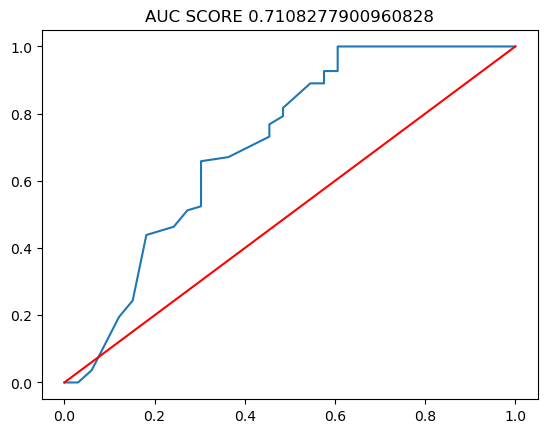

In [71]:
model_validation(xgb,x_train,y_train ,x_test,y_test)

In [72]:
param = {'n_estimators':[20,50,70,100,150,180,200],
        'eta':[2,1,0,0.5,0.1,0.05],
        'max_depth':[3,5,7,9,11,13]}

In [73]:
gscv = GridSearchCV(estimator=XGBClassifier(),
                   param_grid=param,
                   scoring='f1_macro',
                   cv= 3,
                   verbose = 1)

In [74]:
gscv.fit(x_train,y_train)

Fitting 3 folds for each of 252 candidates, totalling 756 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'eta': [2, 1, 0, 0.5, 0.1, 0.05],
                         'max_depth': [3, 5, 7, 9, 11, 13],
                         'n_estimators': [20, 50, 70, 100, 150, 180, 200]},
             scoring='f1_macro', verbose=1)

In [75]:
gscv.best_params_

{'eta': 0.5, 'max_depth': 9, 'n_estimators': 180}

Accuracy: 0.7565217391304347
Confusion Matrix:
 [[15 18]
 [10 72]]
Report:
               precision    recall  f1-score   support

           0       0.60      0.45      0.52        33
           1       0.80      0.88      0.84        82

    accuracy                           0.76       115
   macro avg       0.70      0.67      0.68       115
weighted avg       0.74      0.76      0.75       115

Cohen Kappa Score: 0.35856573705179284


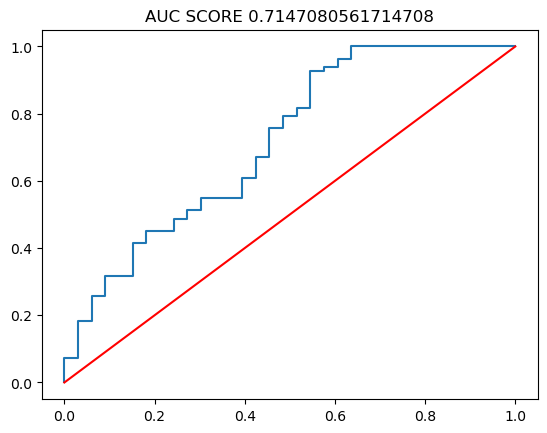

In [76]:
model_validation(XGBClassifier(**gscv.best_params_),x_train,y_train ,x_test,y_test)

### Apply on Inclass DATA

In [77]:
data = pd.read_csv('emp_attrition.csv')

In [78]:
data_e = pd.get_dummies(data,drop_first = True)

In [79]:
x = data_e.drop(columns=['Attrition_Yes'])
y = data_e['Attrition_Yes']

In [80]:
x_train,x_test,y_train,y_test= train_test_split(x,y,train_size = 0.75,stratify = y)

Accuracy: 0.8430379746835444
Confusion Matrix:
 [[186  34]
 [ 28 147]]
Report:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86       220
           1       0.81      0.84      0.83       175

    accuracy                           0.84       395
   macro avg       0.84      0.84      0.84       395
weighted avg       0.84      0.84      0.84       395

Cohen Kappa Score: 0.6830594020965446


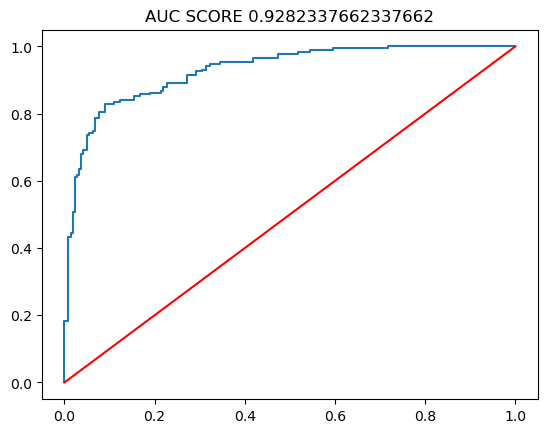

In [81]:
model_validation(gbc,x_train,y_train ,x_test,y_test)

Accuracy: 0.8987341772151899
Confusion Matrix:
 [[191  29]
 [ 11 164]]
Report:
               precision    recall  f1-score   support

           0       0.95      0.87      0.91       220
           1       0.85      0.94      0.89       175

    accuracy                           0.90       395
   macro avg       0.90      0.90      0.90       395
weighted avg       0.90      0.90      0.90       395

Cohen Kappa Score: 0.7969412671893072


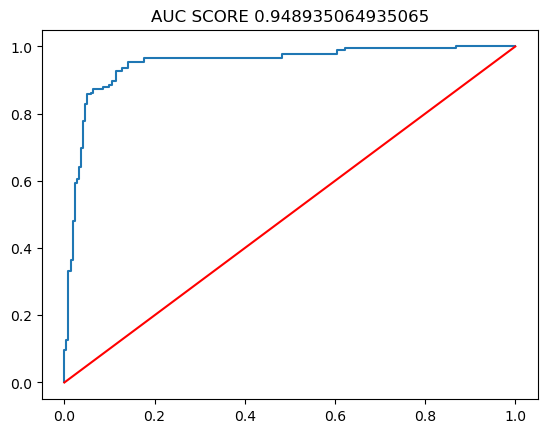

In [82]:
model_validation(xgb,x_train,y_train ,x_test,y_test)

### Stacking

In [87]:
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [91]:
base_models = [('Logistic Regression',LogisticRegression(solver='liblinear')),
              ('Naive Bayes',GaussianNB()),
              ('Decision Tree',DecisionTreeClassifier(max_depth=5)),
              ('Gradient Boosting',GradientBoostingClassifier(n_estimators=100,max_depth=5))]

In [92]:
stack = StackingClassifier(estimators=base_models,stack_method='predict_proba',cv = 3)

In [94]:
stack.fit(x_train,y_train)

StackingClassifier(cv=3,
                   estimators=[('Logistic Regression',
                                LogisticRegression(solver='liblinear')),
                               ('Naive Bayes', GaussianNB()),
                               ('Decision Tree',
                                DecisionTreeClassifier(max_depth=5)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(max_depth=5))],
                   stack_method='predict_proba')

Accuracy: 0.9265822784810127
Confusion Matrix:
 [[199  21]
 [  8 167]]
Report:
               precision    recall  f1-score   support

           0       0.96      0.90      0.93       220
           1       0.89      0.95      0.92       175

    accuracy                           0.93       395
   macro avg       0.92      0.93      0.93       395
weighted avg       0.93      0.93      0.93       395

Cohen Kappa Score: 0.8523554810852614


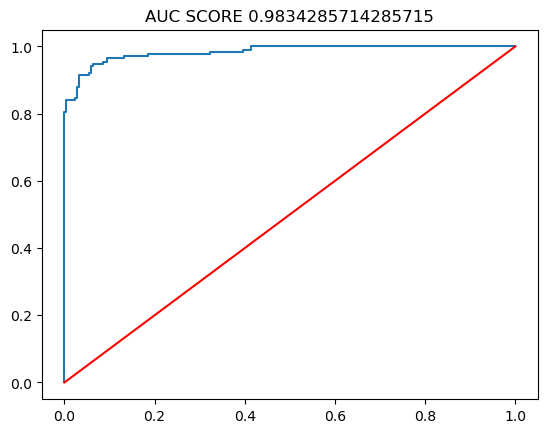

In [95]:
model_validation(stack,x_train,y_train,x_test,y_test)

### Voting

In [96]:
from sklearn.ensemble import VotingClassifier

In [97]:
base_models = [('Logistic Regression',LogisticRegression(solver='liblinear')),
              ('Naive Bayes',GaussianNB()),
              ('Decision Tree',DecisionTreeClassifier(max_depth=5)),
              ('Gradient Boosting',GradientBoostingClassifier(n_estimators=100,max_depth=5)),
              ('AdaBoost',AdaBoostClassifier(n_estimators=100,learning_rate=0.1))]

In [100]:
vc = VotingClassifier(estimators=base_models,voting='soft')

Accuracy: 0.8253164556962025
Confusion Matrix:
 [[183  37]
 [ 32 143]]
Report:
               precision    recall  f1-score   support

           0       0.85      0.83      0.84       220
           1       0.79      0.82      0.81       175

    accuracy                           0.83       395
   macro avg       0.82      0.82      0.82       395
weighted avg       0.83      0.83      0.83       395

Cohen Kappa Score: 0.6470702492716089


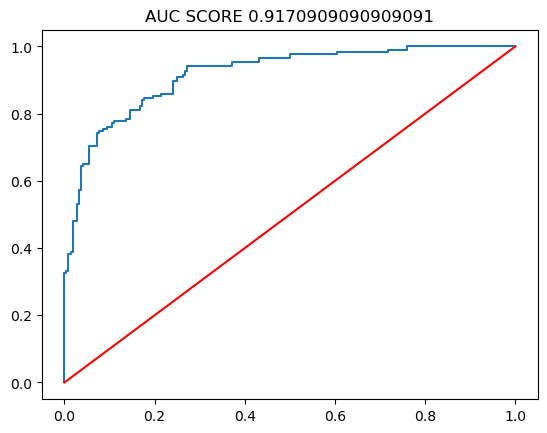

In [101]:
model_validation(vc,x_train,y_train,x_test,y_test)